In [1]:
import pandas as pd

In [2]:
df=pd.read_csv("Energy Consumption 3.csv")

In [3]:
df.head() #There is a dependency of the conversion factor CO2 emissions.

,Campus,EnergyConsumptionAverage4Years,CoveredBuildingArea,AreaAccordingToUse,TotalPopulation,CO2Emissions
0,AP,402785,8765,4587,913,284.769
1,CM,662009,19432,11884,1903,468.014
2,CP,794325,35611,15275,2469,561.588
3,CT,2973136,73569,46223,9038,2102.007
4,DV,724261,19722,18894,1411,512.053


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13 entries, 0 to 12
Data columns (total 6 columns):
Campus                            13 non-null object
EnergyConsumptionAverage4Years    13 non-null int64
CoveredBuildingArea               13 non-null int64
AreaAccordingToUse                13 non-null int64
TotalPopulation                   13 non-null int64
CO2Emissions                      13 non-null float64
dtypes: float64(1), int64(4), object(1)
memory usage: 704.0+ bytes


## Determining the correlation between variables

In [5]:
import seaborn as sns

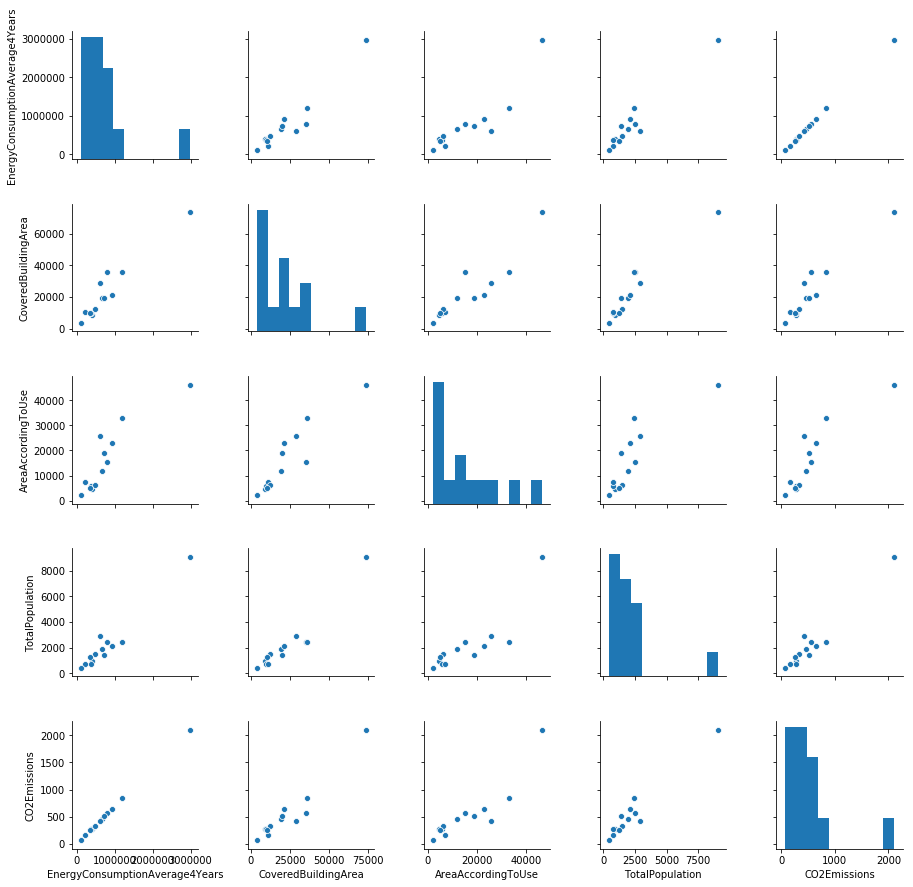

In [6]:
sns.pairplot(df)

In [7]:
X=df[["CoveredBuildingArea","AreaAccordingToUse","TotalPopulation","EnergyConsumptionAverage4Years"]]
print(X)

    CoveredBuildingArea  AreaAccordingToUse  TotalPopulation  \
0                  8765                4587              913   
1                 19432               11884             1903   
2                 35611               15275             2469   
3                 73569               46223             9038   
4                 19722               18894             1411   
5                  9895                5724              735   
6                 10681                7226              730   
7                 12206                6317             1505   
8                 21120               22786             2107   
9                 35745               33023             2396   
10                28806               25753             2884   
11                 3828                2190              441   
12                10019                4937             1254   

    EnergyConsumptionAverage4Years  
0                           402785  
1                           6

In [8]:
y=df["CO2Emissions"]
print(y)

0      284.769
1      468.014
2      561.588
3     2102.007
4      512.053
5      271.411
6      161.533
7      337.389
8      649.915
9      842.301
10     432.307
11      74.789
12     251.186
Name: CO2Emissions, dtype: float64


## Splitting the model into training and test sets

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.1)

## Fitting the data into our model

In [11]:
from sklearn.linear_model import LinearRegression 

In [12]:
lin=LinearRegression()

In [13]:
lin.fit(X_train,y_train)
print("Training complete.")

Training complete.


In [14]:
y_pred=lin.predict(X_test)

In [15]:
print(y_pred)

[468.04054433  74.79019214]


In [18]:
from sklearn import metrics  
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred)) 

Mean Absolute Error: 0.013868238072156203


 ## Plotting the Multilinear Regression

In [19]:
%matplotlib inline
import matplotlib.pyplot as plt

In [20]:
import statsmodels.formula.api as smf

In [27]:
model = smf.ols(formula='CO2Emissions ~ EnergyConsumptionAverage4Years + AreaAccordingToUse', data=df)

In [28]:
results_formula = model.fit()
results_formula.params

Intercept                        -2.958492e-03
EnergyConsumptionAverage4Years    7.069972e-04
AreaAccordingToUse                2.111008e-07
dtype: float64

In [29]:
import numpy as np

In [30]:
x_surf, y_surf = np.meshgrid(np.linspace(df.EnergyConsumptionAverage4Years.min(), df.EnergyConsumptionAverage4Years.max(), 100),np.linspace(df.AreaAccordingToUse.min(), df.AreaAccordingToUse.max(), 100))

In [31]:
onlyX = pd.DataFrame({'EnergyConsumptionAverage4Years': x_surf.ravel(), 'AreaAccordingToUse': y_surf.ravel()})

In [32]:
fittedY=results_formula.predict(exog=onlyX)

In [33]:
fittedY=np.array(fittedY)

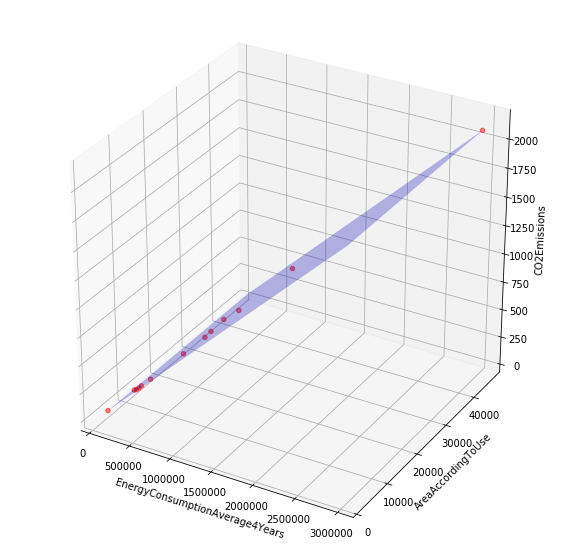

In [45]:
fig = plt.figure()
ax = fig.add_subplot(111,projection='3d')
ax.scatter(df['EnergyConsumptionAverage4Years'],df['AreaAccordingToUse'],df['CO2Emissions'],c='red', marker='o', alpha=0.5)
ax.plot_surface(x_surf,y_surf,fittedY.reshape(x_surf.shape), color='b', alpha=0.3)
ax.set_xlabel('EnergyConsumptionAverage4Years')
ax.set_ylabel('AreaAccordingToUse')
ax.set_zlabel('CO2Emissions')
fig.set_size_inches(10,10)
plt.show()
